In [14]:
# import kaggle


# !pip install kaggle

In [15]:
import zipfile
zip_file=zipfile.ZipFile("D:\data scinece master\EDA4\loan-approval-dataset.zip","r")
zip_file.extractall()
zip_file.close()

In [16]:
import pandas as pd
import numpy as np
df=pd.read_csv("D:\data scinece master\EDA4\loan_approval.csv")
df.head(5)

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [17]:
df.dtypes

name               object
city               object
income              int64
credit_score        int64
loan_amount         int64
years_employed      int64
points            float64
loan_approved        bool
dtype: object

In [18]:
df.describe(include=['object','int64'])

,name,city,income,credit_score,loan_amount,years_employed
count,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000
unique,2000,1882,NaN,NaN,NaN,NaN
top,Allison Hill,North Joseph,NaN,NaN,NaN,NaN
freq,1,4,NaN,NaN,NaN,NaN
mean,NaN,NaN,90585.977000,573.946000,25308.503000,20.441000
std,NaN,NaN,34487.874907,160.564945,14207.320147,11.777813
min,NaN,NaN,30053.000000,300.000000,1022.000000,0.000000
25%,NaN,NaN,61296.250000,433.000000,12748.750000,10.000000
50%,NaN,NaN,90387.500000,576.000000,25661.500000,21.000000
75%,NaN,NaN,120099.750000,715.000000,37380.500000,31.000000


In [19]:
df.isna().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [20]:
# print("the columns are\n:")
print(pd.DataFrame({'Columns Names are':df.columns}))
print("====="*20)
print("the shape is\n:",df.shape)
print("====="*20)
print("the dtypes are\n:")
print(pd.DataFrame({'Column':df.columns,'Dtype':df.dtypes.values}))
print("====="*20)
print("the Numeric Summary is\n:",df.describe())
print("\n===== Categoical Summary ======")
print(df.describe(include='object'))
print("====="*20)
print("The Missing Values are\n:",df.isnull().sum())

  Columns Names are
0              name
1              city
2            income
3      credit_score
4       loan_amount
5    years_employed
6            points
7     loan_approved
the shape is
: (2000, 8)
the dtypes are
:
           Column    Dtype
0            name   object
1            city   object
2          income    int64
3    credit_score    int64
4     loan_amount    int64
5  years_employed    int64
6          points  float64
7   loan_approved     bool
the Numeric Summary is
:               income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.000000   2000.000000     2000.000000  2000.000000
mean    90585.977000    573.946000  25308.503000       20.441000    56.680000
std     34487.874907    160.564945  14207.320147       11.777813    18.638033
min     30053.000000    300.000000   1022.000000        0.000000    10.000000
25%     61296.250000    433.000000  12748.750000       10.000000    45.000000
50%     90387.500000    576.000000  25661.

In [21]:
print("the dtypes are\n:")
print(pd.DataFrame({'Column':df.columns,'Dtype':df.dtypes.values}))
print("====="*20)
print(df.head(3))

the dtypes are
:
           Column    Dtype
0            name   object
1            city   object
2          income    int64
3    credit_score    int64
4     loan_amount    int64
5  years_employed    int64
6          points  float64
7   loan_approved     bool
           name           city  income  credit_score  loan_amount  \
0  Allison Hill      East Jill  113810           389        39698   
1  Brandon Hall  New Jamesside   44592           729        15446   
2  Rhonda Smith   Lake Roberto   33278           584        11189   

   years_employed  points  loan_approved  
0              27    50.0          False  
1              28    55.0          False  
2              13    45.0          False  


In [22]:
def check_uniauq_values(df):
    for col in df.select_dtypes(include='bool').columns:
        unique_vals=df[col].value_counts()
        print(f"columns {col} has \n{unique_vals} unique values")
        print('===='*20)
        print("===="*20)
        unique_vals=df[col].nunique()
        print(f"columns {col} has \n {unique_vals} unique columns")
        print('===='*20)
        print("===="*20)
check_uniauq_values(df)

columns loan_approved has 
loan_approved
False    1121
True      879
Name: count, dtype: int64 unique values
columns loan_approved has 
 2 unique columns


In [23]:
df.drop(['name'],axis=1,inplace=True)

In [24]:
df['city'].value_counts()

city
North Joseph        4
Williamsstad        3
West Elizabeth      3
Port Christopher    3
East Mary           3
                   ..
Lake Sean           1
Williamston         1
Jimenezburgh        1
South Kaylee        1
New Nathantown      1
Name: count, Length: 1882, dtype: int64

In [25]:
frequency_map=df['city'].value_counts().to_dict()
print(len(frequency_map))
df['city_freq']=df['city'].map(frequency_map)
print(df['city_freq'].value_counts())
print(df[['city','city_freq']].head(20))


1882
city_freq
1    1776
2     190
3      30
4       4
Name: count, dtype: int64
                    city  city_freq
0              East Jill          2
1          New Jamesside          1
2           Lake Roberto          1
3       West Melanieview          1
4              Mariastad          1
5        Port Jesseville          1
6            Lake Joseph          2
7             Nelsonside          1
8        Port Leslieview          1
9         Wilkersonmouth          1
10             Hurstfurt          1
11  East Courtneychester          1
12     Lake Jenniferside          1
13           Teresaburgh          1
14          West Kathryn          1
15              Johnbury          1
16            East Donna          1
17            Lake Larry          1
18       New Angelashire          1
19        Port Markhaven          1


In [26]:
df.drop(['city'],axis=1,inplace=True)

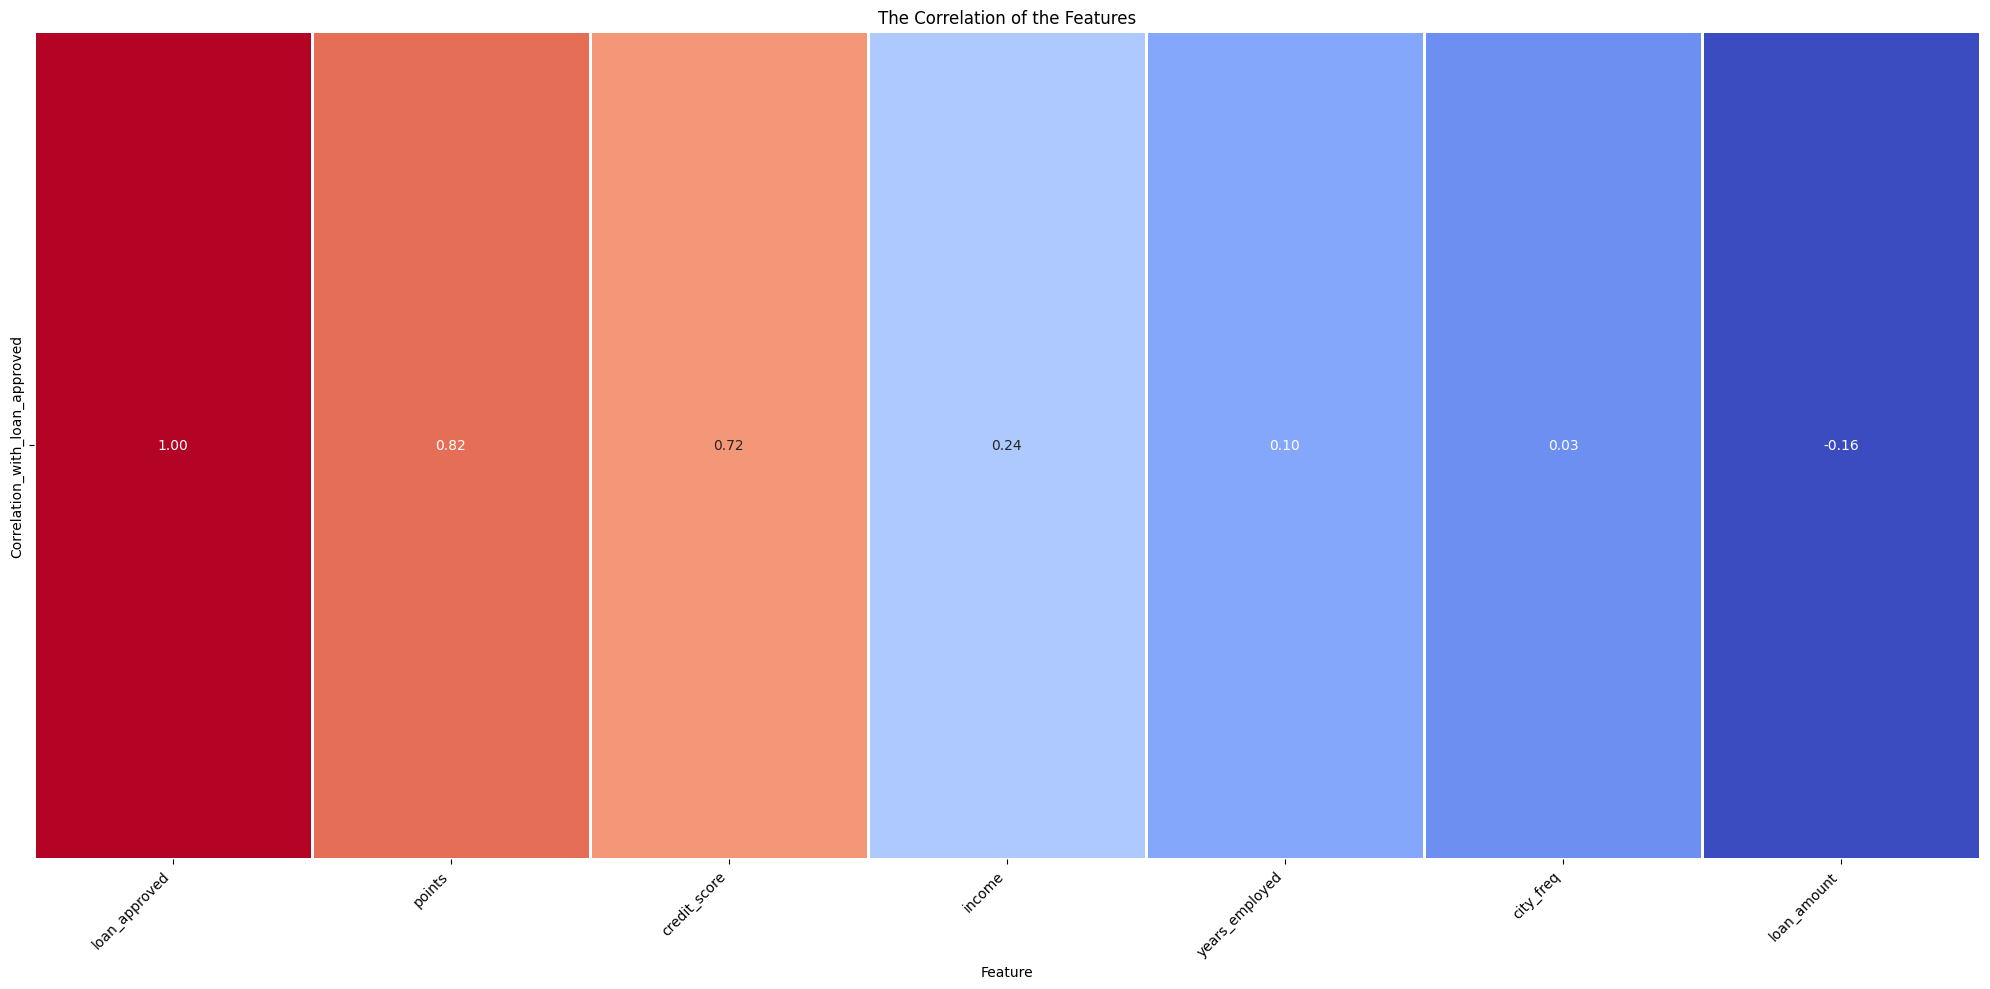

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

le=LabelEncoder()
df['loan_approved']=le.fit_transform(df['loan_approved'])

target="loan_approved"


corr_with_target=df.corr()[target].sort_values(ascending=False)
corr_df=pd.DataFrame(corr_with_target).reset_index()
corr_df.columns=['Feature',f'Correlation_with_{target}']

plt.figure(figsize=(20,10))
sns.heatmap(corr_df.set_index('Feature').T,annot=True,cmap='coolwarm',fmt='.2f',linewidths=1,cbar=False)
plt.title("The Correlation of the Features")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()


In [28]:
df.dtypes

income              int64
credit_score        int64
loan_amount         int64
years_employed      int64
points            float64
loan_approved       int64
city_freq           int64
dtype: object

Skewness values are
:
years_employed   -0.027957
income           -0.012116
credit_score      0.001721
loan_amount       0.007863
points            0.231446
loan_approved     0.243974
city_freq         3.343018
dtype: float64


C:\Users\venka\AppData\Local\Temp\ipykernel_19092\1158553420.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_values.index,y=skew_values.values,palette='coolwarm')


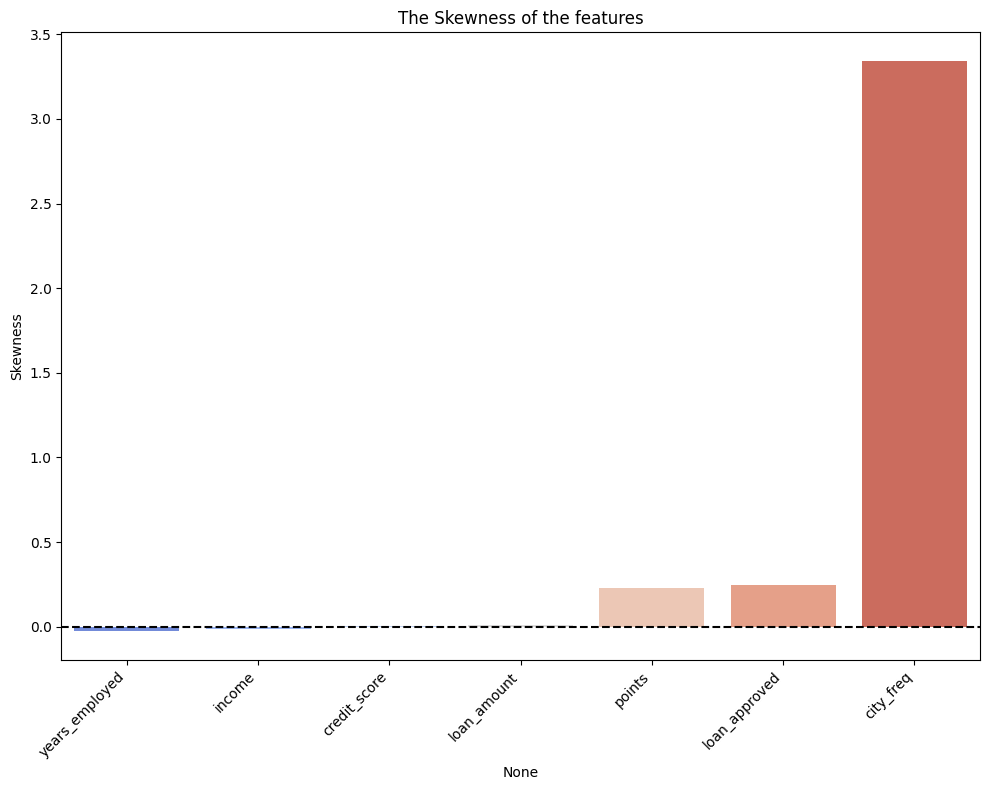

In [29]:
df_cols=df.select_dtypes(include=['int64','float64']).columns
skew_values=df[df_cols].skew().sort_values(ascending=True)
print("Skewness values are\n:")
print(skew_values)

plt.figure(figsize=(10,8))
sns.barplot(x=skew_values.index,y=skew_values.values,palette='coolwarm')
plt.title("The Skewness of the features")
plt.xticks(rotation=45,ha='right')
plt.axhline(0,color='black',linestyle='--')
plt.ylabel('Skewness')
plt.tight_layout()

In [30]:
from scipy.stats import skew
skewed_values=["city_freq"]
for col in skewed_values:
    df[col]=np.log1p(df[col])

In [31]:
df['dti'] = df['loan_amount'] / df['income']

In [32]:
bins=[0,3000,6000,10000,float('inf')]
labels=['Low','Medium','High','Very High']
df['income_bracket']=pd.cut(df['income'],bins=bins,labels=labels)


In [33]:
bins = [0, 20000, 50000, 100000, float('inf')]
labels = ['Small', 'Medium', 'Large', 'Very Large']
df['loan_bracket'] = pd.cut(df['loan_amount'], bins=bins, labels=labels)


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['loan_bracket']=le.fit_transform(df['loan_bracket'])
df['income_bracket']=le.fit_transform(df['income_bracket'])

In [35]:
df['loan_bracket'].value_counts()

loan_bracket
0    1217
1     783
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split


x=df.drop(['loan_approved'],axis=1)
y=df['loan_approved']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelEncoder
import joblib
import shap
import argparse

c:\Users\venka\anaconda3\envs\data_science_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
df['loan_approved']

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    0
1997    1
1998    0
1999    0
Name: loan_approved, Length: 2000, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
print("the accuracy of the Logistic Regression is:",accuracy_score(y_test,log_pred))
report = classification_report(y_test, log_pred, target_names=['Loan Approved (0)', 'Not Approved (1)'])
print("the Classficaation Report is:")
print(report)
print("the confusion matrix is :")
print(confusion_matrix(y_test,log_pred))

the accuracy of the Logistic Regression is: 0.84
the Classficaation Report is:
                   precision    recall  f1-score   support

Loan Approved (0)       0.87      0.83      0.85       217
 Not Approved (1)       0.81      0.85      0.83       183

         accuracy                           0.84       400
        macro avg       0.84      0.84      0.84       400
     weighted avg       0.84      0.84      0.84       400

the confusion matrix is :
[[181  36]
 [ 28 155]]


c:\Users\venka\anaconda3\envs\data_science_project\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
xgb=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
print("the accuracy of the XGB_classifier is:",accuracy_score(y_test,xgb_pred))
report = classification_report(y_test, log_pred, target_names=['Loan Approved (0)', 'Not Approved (1)'])
print("the Classficaation Report is:")
print(report)
print("the confusion matrix is:")
print(confusion_matrix(y_test,xgb_pred))

the accuracy of the XGB_classifier is: 1.0
the Classficaation Report is:
                   precision    recall  f1-score   support

Loan Approved (0)       0.87      0.83      0.85       217
 Not Approved (1)       0.81      0.85      0.83       183

         accuracy                           0.84       400
        macro avg       0.84      0.84      0.84       400
     weighted avg       0.84      0.84      0.84       400

the confusion matrix is:
[[217   0]
 [  0 183]]


c:\Users\venka\anaconda3\envs\data_science_project\lib\site-packages\xgboost\training.py:183: UserWarning: [14:01:11] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("the accuracy of the RF_classifier is:",accuracy_score(y_test,rf_pred))
report = classification_report(y_test, log_pred, target_names=['Loan Approved (0)', 'Not Approved (1)'])
print("the Classficaation Report is:")
print(report)
print("the confusion matrix is:")
print(confusion_matrix(y_test,rf_pred))


the accuracy of the RF_classifier is: 1.0
the Classficaation Report is:
                   precision    recall  f1-score   support

Loan Approved (0)       0.87      0.83      0.85       217
 Not Approved (1)       0.81      0.85      0.83       183

         accuracy                           0.84       400
        macro avg       0.84      0.84      0.84       400
     weighted avg       0.84      0.84      0.84       400

the confusion matrix is:
[[217   0]
 [  0 183]]


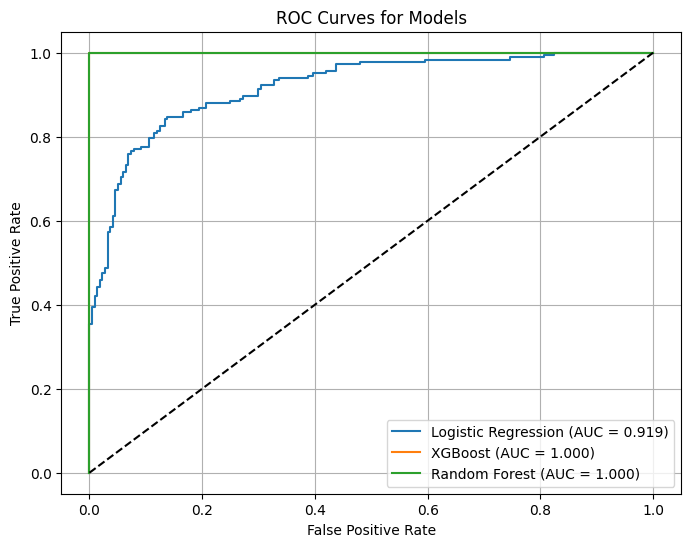

In [42]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, precision_recall_fscore_support,
    roc_curve, precision_recall_curve, auc
)
import matplotlib.pyplot as plt

# Replace `le` with your logistic regression model (e.g., `lr`)
lr_proba = log.predict_proba(x_test)[:, 1]  # Use your logistic regression model
xgb_proba = xgb.predict_proba(x_test)[:, 1]
rf_proba = rf.predict_proba(x_test)[:, 1]

plt.figure(figsize=(8, 6))
for model_name, probs in {
    'Logistic Regression': lr_proba,
    'XGBoost': xgb_proba,
    'Random Forest': rf_proba
}.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


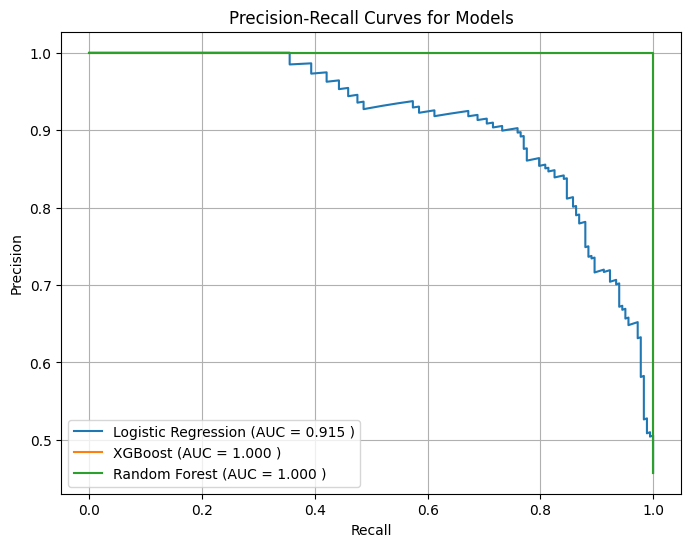

In [43]:
plt.figure(figsize=(8,6))
for model_name, probs in {
    'Logistic Regression': lr_proba,
    'XGBoost': xgb_proba,
    'Random Forest': rf_proba
}.items():
    precision, recall, _ = precision_recall_curve(y_test, probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f} )')

plt.title("Precision-Recall Curves for Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

# Example for Logistic Regression
train_proba = log.predict_proba(x_train)[:,1]
test_proba = log.predict_proba(x_test)[:,1]

print("Train AUC:", roc_auc_score(y_train, train_proba))
print("Test AUC:", roc_auc_score(y_test, test_proba))


Train AUC: 0.9110514571254196
Test AUC: 0.919266701921382


In [45]:
corr = df.corr()['loan_approved'].abs().sort_values(ascending=False)
print(corr.head(10))


loan_approved     1.000000
points            0.821415
credit_score      0.715788
dti               0.249378
income            0.238066
loan_bracket      0.164854
loan_amount       0.157859
years_employed    0.104408
city_freq         0.024423
income_bracket         NaN
Name: loan_approved, dtype: float64


In [46]:
import joblib
joblib.dump(rf,"RandomForest.joblib")

['RandomForest.joblib']